In [346]:
import pandas as pd
import os

In [347]:
pwd = os.getcwd()

In [348]:
mb = pd.read_csv(pwd + '/Data/Data - Map Banned.csv', usecols=['Map','Total']).iloc[1:]
mp = pd.read_csv(pwd + '/Data/Data - Map Picked.csv', usecols=['Map','Total'])
ss = pd.read_csv(pwd + '/Data/Data - Side Statistics.csv')


In [349]:
map_data = pd.merge(mp,mb, on='Map')
map_data = pd.merge(map_data,ss, on='Map')
map_data

,Map,Total_x,Total_y,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [350]:
map_data=map_data.rename(columns={'Total_x': 'Picked','Total_y':'Banned'})
map_data

,Map,Picked,Banned,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\founc\AppData\Local\Temp\ipykernel_18100\1189163871.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


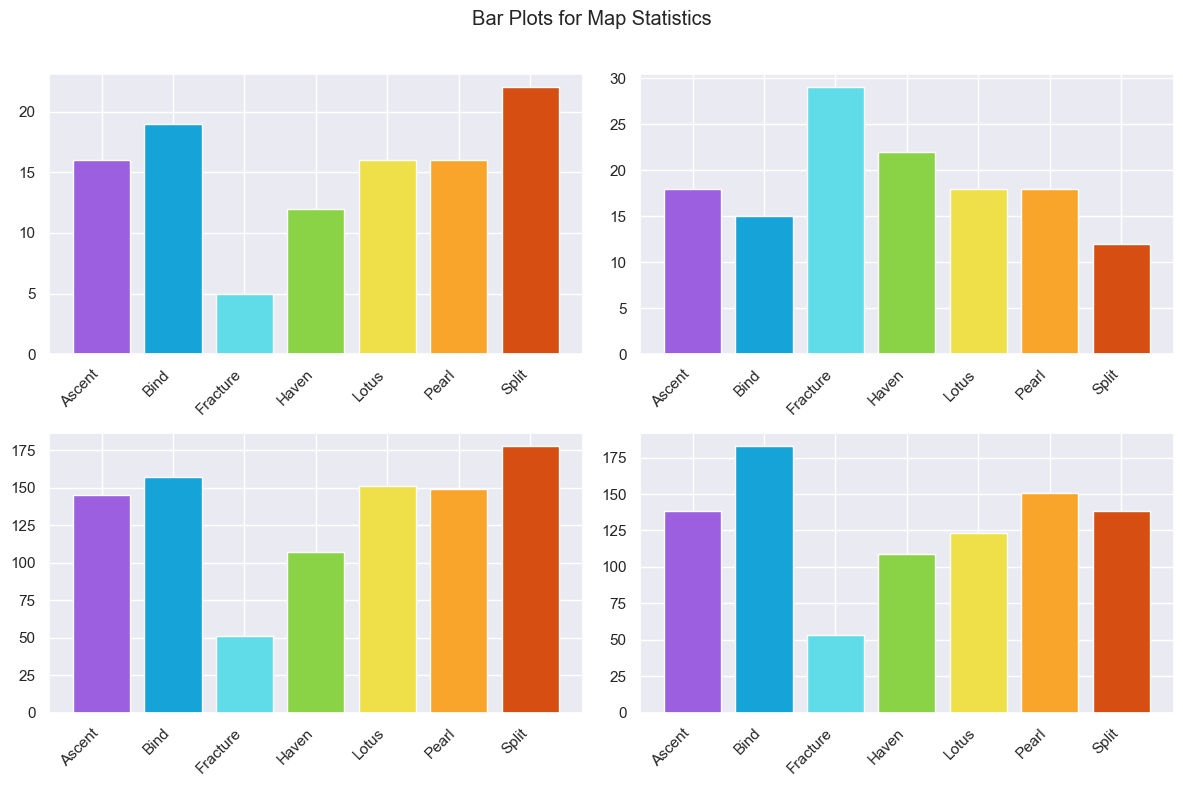

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bar Plots for Map Statistics')
colors = ['#9b5fe0', '#16a4d8', '#60dbe8', '#8bd346', '#efdf48','#f9a52c','#d64e12']  

# Define the columns to plot
columns = ['Picked', 'Banned', 'Atk Wins', 'Def Wins']
titles = ['Picked', 'Banned', 'Attack Wins', 'Defense Wins']

# Iterate through the columns and plot them
for i, column in enumerate(columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.bar(map_data['Map'], map_data[column], color=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Images/map stats.jpeg')
plt.show()


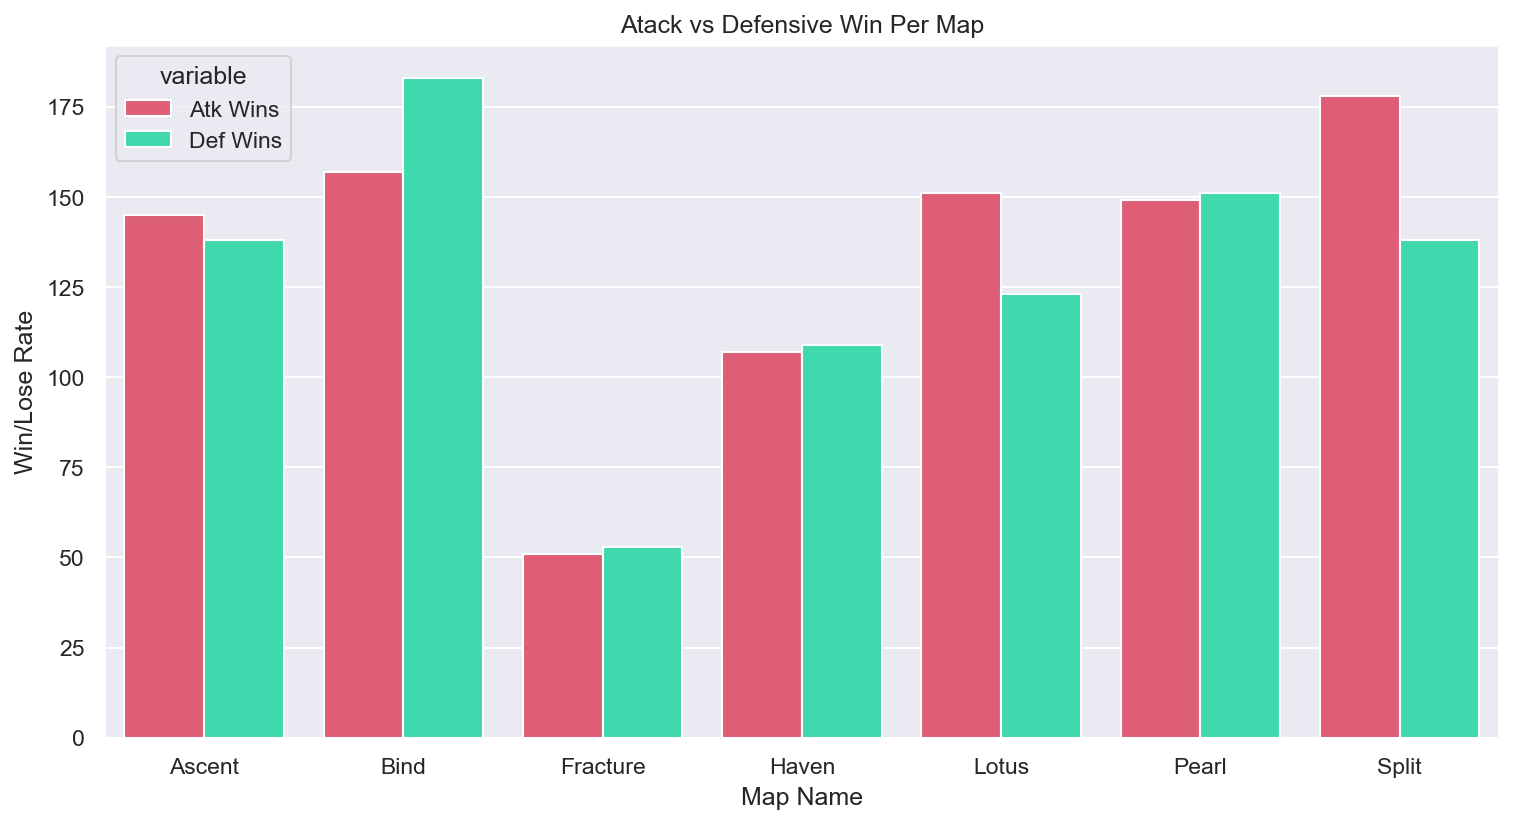

In [353]:
plt.figure(dpi=150, figsize=(12,6))

ss_melt = ss.melt(id_vars=['Map'], value_vars=['Atk Wins', 'Def Wins'])
color_to_add=['#F24968','#27F2B9']

sns.barplot(data=ss_melt, x='Map', y='value', hue='variable', palette=color_to_add)


plt.title('Atack vs Defensive Win Per Map')
plt.xlabel('Map Name')
plt.ylabel('Win/Lose Rate')

plt.savefig('Images/Win Rate.jpeg')                                                
plt.show()

In [354]:
ps = pd.read_csv(pwd + '/Data/Edited Data - Player Statistics.csv')
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


C:\Users\founc\AppData\Local\Temp\ipykernel_18100\2564181898.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


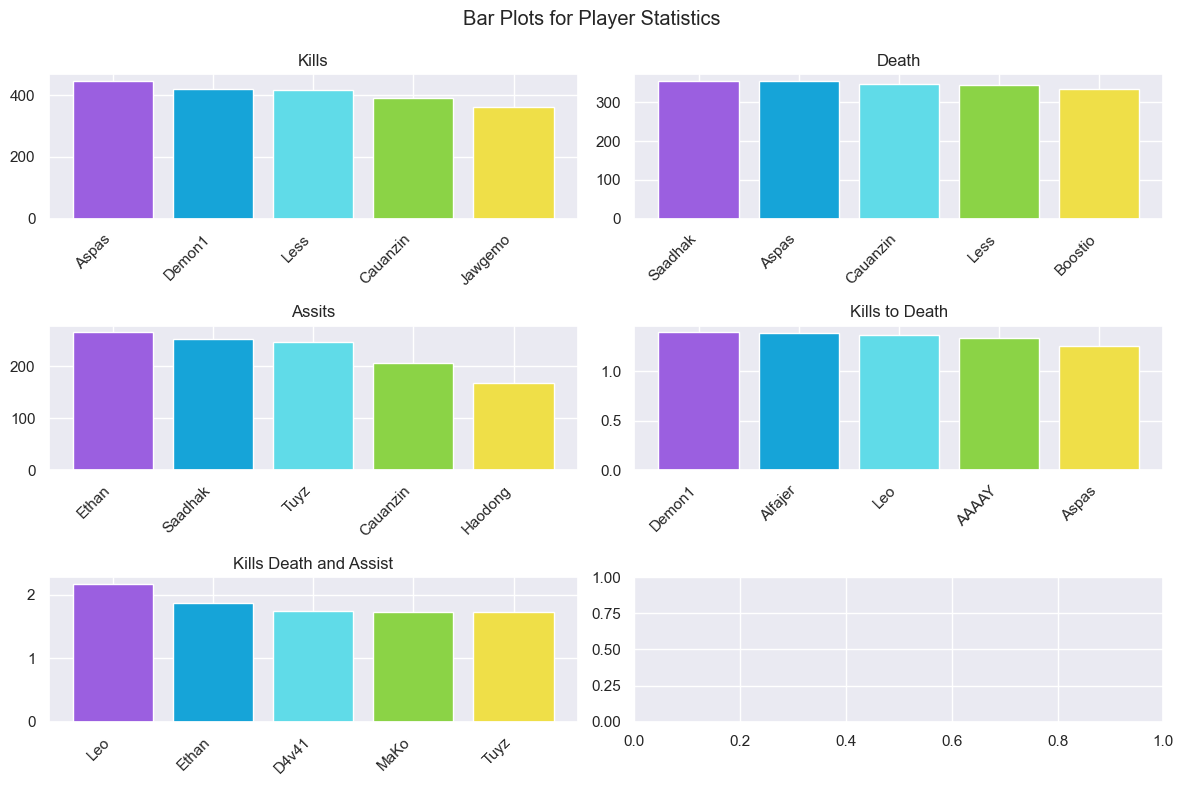

In [355]:

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Bar Plots for Player Statistics')

# Define the columns to plot
columns = ['K', 'D', 'A', 'KD', 'KDA']
titles = ['Kills', 'Death', 'Assits', 'Kills to Death', 'Kills Death and Assist']
colors = ['#9b5fe0', '#16a4d8', '#60dbe8', '#8bd346', '#efdf48','#f9a52c','#d64e12']  

# Iterate through the columns and plot them
for i, column in enumerate(columns):
    row, col = divmod(i, 2)

    top_5 = ps.sort_values(by=column, ascending=False).head(5)


    ax = axes[row, col]
    ax.bar(top_5['Player'], top_5[column], color=colors)
    ax.set_title(titles[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Images/player stats.jpeg')
plt.show()

In [356]:
import numpy as np

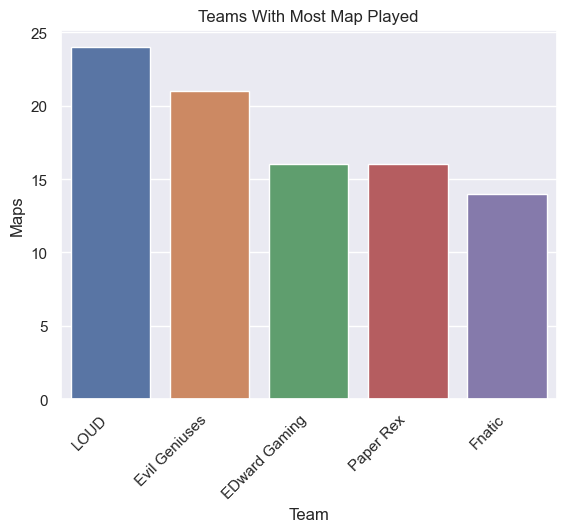

In [357]:
maps_played_most = ps.sort_values(by='Maps', ascending=False)
team_maps = maps_played_most[::5].head(5)

g = sns.barplot(data=team_maps, y='Maps', x='Team')
plt.title('Teams With Most Map Played')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.savefig('Images/maps played.jpeg')
plt.show()

# Working on agent picks

In [358]:
ps.fillna(" ", inplace = True)
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,


In [359]:
ps2 = ps[['Agent 1', 'Agent 2', 'Agent 3']]
ps2

,Agent 1,Agent 2,Agent 3
0,Raze,Jett,
1,Raze,Jett,
2,Jett,Astra,Chamber
3,Raze,Jett,
4,Raze,Phoenix,
...,...,...,...
75,Omen,Killjoy,Brimstone
76,Astra,Viper,Harbor
77,Skye,Astra,
78,Brimstone,Astra,


In [360]:
agent_pick = ps2[['Agent 1', 'Agent 2', 'Agent 3']].stack().value_counts().reset_index().tail(-1)

ap = agent_pick.rename(columns={'index': 'agents', 'count':'pick rate'})

In [361]:
data = ap.to_dict('list')

result_dict = {}

for agent, pick_rate in zip(data['agents'], data['pick rate']):
    agent = agent.strip()
    result_dict[agent] = result_dict.get(agent, 0) + pick_rate

agent_pick_rate = pd.DataFrame(result_dict.items(), columns=['Agent', 'Total Pick Rate'])
agent_pick_rate


,Agent,Total Pick Rate
0,Killjoy,22
1,Raze,17
2,Skye,18
3,Viper,19
4,Omen,16
5,Breach,13
6,Sova,12
7,Jett,17
8,Astra,11
9,Brimstone,11


In [362]:
agent_pick_rate.to_csv(path_or_buf= 'Data/Data - Most Agent Picked.csv')


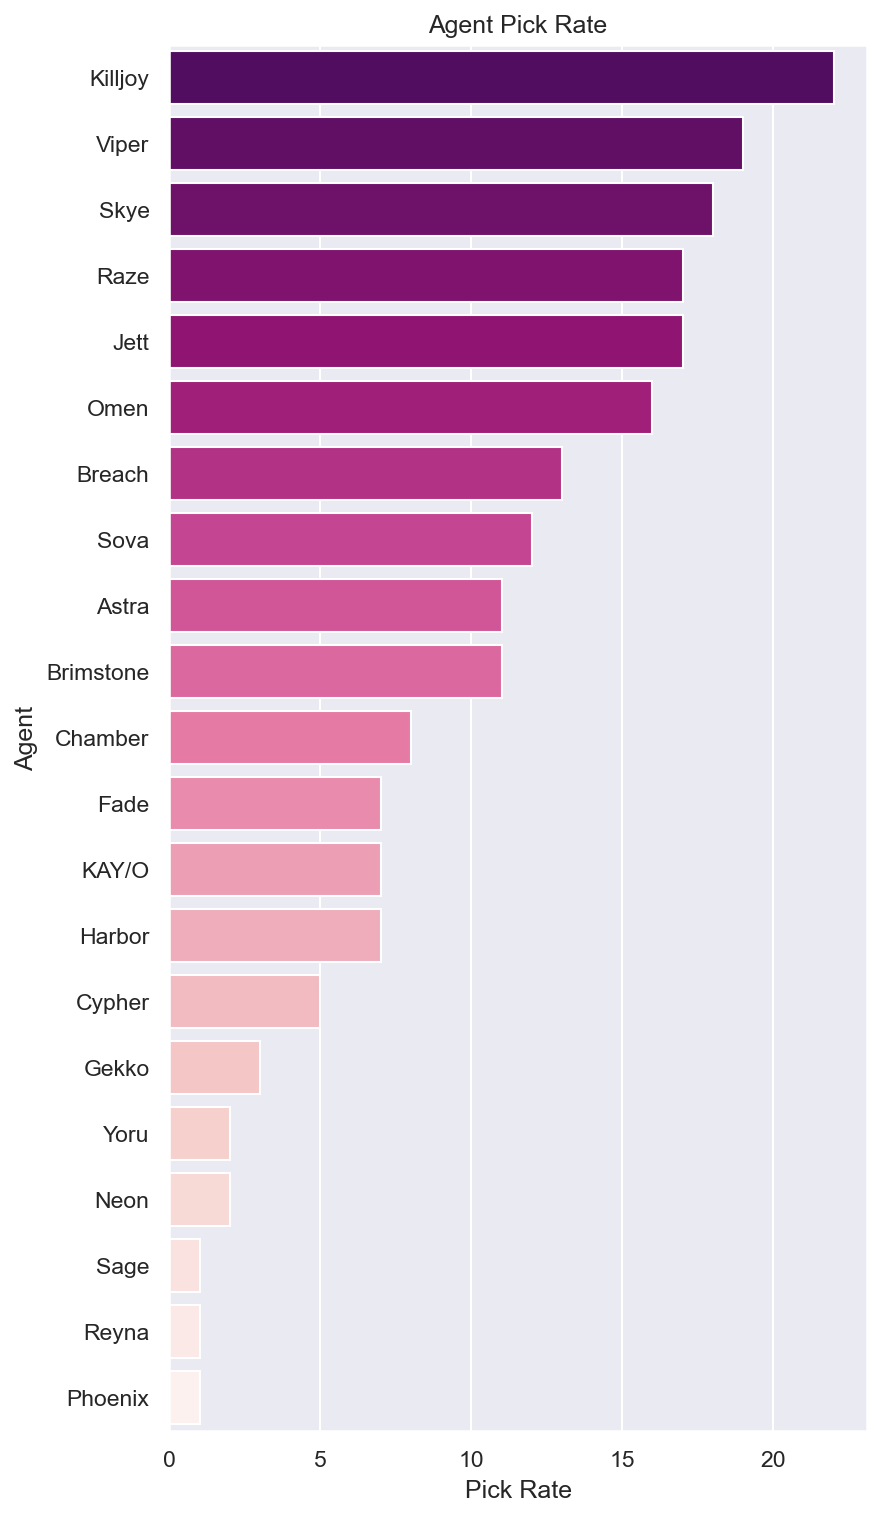

In [363]:


plt.figure(dpi=150, figsize=(6,12))

agpr_sorted = agent_pick_rate.sort_values(by= 'Total Pick Rate', ascending= False)
sns.barplot(data= agpr_sorted, x='Total Pick Rate', y = 'Agent', palette='RdPu_r')


plt.title('Agent Pick Rate')
plt.xlabel('Pick Rate')
plt.ylabel('Agent')

plt.savefig('Images/Agent Counts.jpeg')
plt.show()

In [364]:
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,
